In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from nn_utils import Net, DEVICE, TRAINLOADER, train_nn, test_nn, freeze_parameters

torch.cuda.empty_cache()

PATH = './nn-models/cifar10-nn-model'

# load the pretrained NN model
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device=DEVICE)

test_nn(net=net, verbose=True)

Files already downloaded and verified
Files already downloaded and verified
Testing on 10,000 test images ...
- Correct: 8352
- Total: 10000
- Accuracy: 83


83

Gradient descent

Accuracy before freezing parameters and randomizing last layer: 83
Accuracy after freezing parameters and randomizing last layer: 10
Using cuda device
Initialising training ...
- Epochs: 4
- Mini batch size: 128
- Optimiser: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)
- Loss function: cross_entropy
Epoch: 0 -- Loss: 1089.6217204928398 -- Accuracy: 67
Epoch: 1 -- Loss: 215.45031486451626 -- Accuracy: 72
Epoch: 2 -- Loss: 119.79974547028542 -- Accuracy: 74
Epoch: 3 -- Loss: 81.03200339153409 -- Accuracy: 76


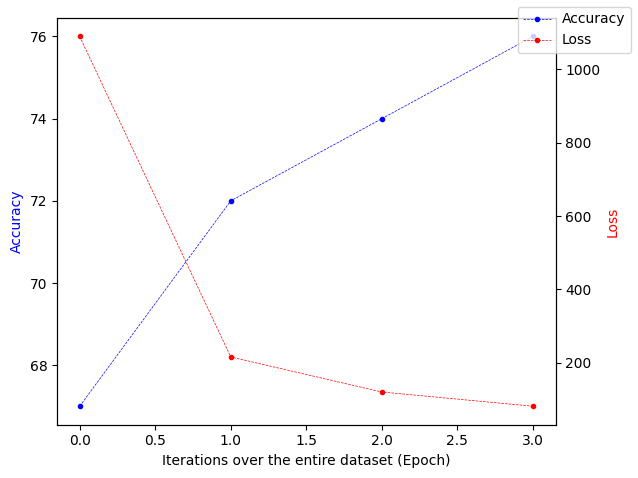

Testing on 10,000 test images ...
- Correct: 7654
- Total: 10000
- Accuracy: 76


76

In [2]:
print(f'Accuracy before freezing parameters and randomizing last layer: {test_nn(net=net, verbose=False)}')
freeze_parameters(net=net)
print(f'Accuracy after freezing parameters and randomizing last layer: {test_nn(net=net, verbose=False)}')

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.0)
train_nn(net=net, epochs=4, optimizer=optimizer)
test_nn(net=net, verbose=True)